# 4.7 Analysis

## Contents
#### Import Libraries
#### Import Data
#### 6. Analyze Individual Profile Distribution
#### 7. Aggregate Summary Statistics of Frequency grouped by profile
#### Aggregate Summary Statistics of Expenditure grouped by profile
#### Analysis of 'Spending_flag'
#### Analysis of 'income_group' and 'frequency_flag'
#### Join Department
#### Compare Profiles with Regions
#### Addressing Stakeholder Questions
##### What time of day do people spend the most money?



## Import Libraries

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [7]:
# Define pathway to relevant folder
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/07-2024 Instacart Basket Analysis'

In [9]:
# Import 8_4_Sample.pkl
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', '8_4_Sample.pkl'))

## 6. Analyze Individual Profile Distribution

In [12]:
# View Columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_placed', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'med_days_prior', 'frequency_flag', 'Unnamed: 0',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge', 'region', 'Activity', 'age_group',
       'income_group', 'family_role', 'profile'],
      dtype='object')

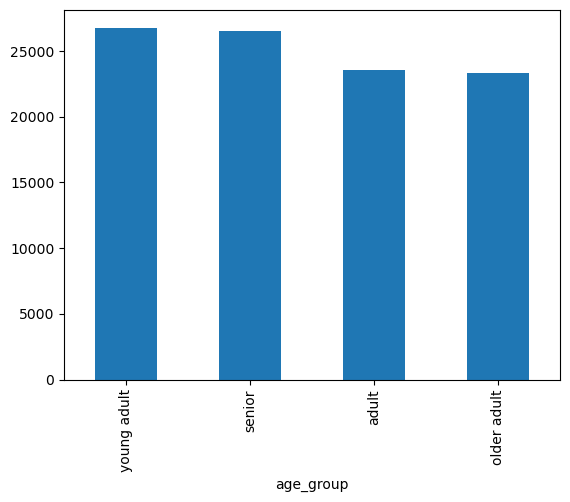

In [16]:
# Create bar chart of distribution of age groups
bar = df['age_group'].value_counts().plot.bar()

In [18]:
# Export Visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_dist.png'))

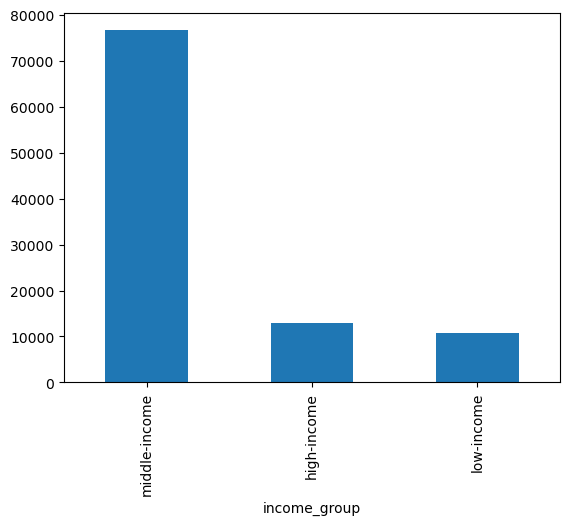

In [20]:
# Create bar chart for distribution of income groups
bar = df['income_group'].value_counts().plot.bar()

In [22]:
# Export Visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_dist.png'))

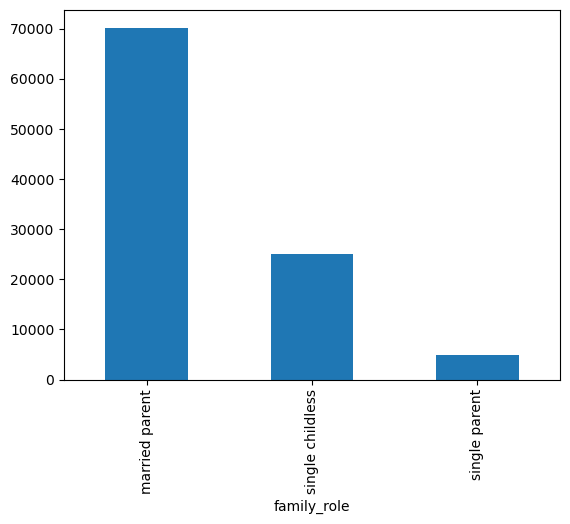

In [24]:
# Create bar chart for distribution of family role
bar = df['family_role'].value_counts().plot.bar()

In [26]:
# Export Visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_role_dist.png'))

## 7. Aggregate Summary Statistics of Frequency grouped by profile

In [32]:
# View Summary Stats for 'med_days_prior' grouped by 'profile'
result_freq_by_prof = df.groupby('profile').agg({'med_days_prior': ['mean', 'min', 'max']})

In [34]:
result = result_freq_by_prof.sort_values(by=('med_days_prior', 'mean'))
result

med_days_prior           
                                                             mean  min   max
profile                                                                     
Female, older adult, high-income, single childless       8.845771  0.0  30.0
Male, young adult, high-income, single parent            8.850000  4.0  17.0
Female, young adult, high-income, married parent         8.950000  2.0  30.0
Female, senior, high-income, single childless            9.053156  1.0  30.0
Female, young adult, high-income, single parent          9.260870  2.0  22.0
Female, older adult, high-income, married parent         9.341023  0.0  30.0
Male, older adult, high-income, single childless         9.400840  2.0  30.0
Male, adult, high-income, single childless               9.542216  2.0  30.0
Female, older adult, low-income, single childless        9.557613  2.0  30.0
Female, adult, high-income, single childless             9.594293  2.0  30.0
Female, senior, high-income, married parent              9.614227  1.0  30.0
Male, senior, high-income, married parent                9.711518  0.0  30.0
Male, young adult, middle-income, single parent          9.723628  0.0  30.0
Male, young adult, middle-income, married parent         9.756159  1.0  30.0
Female, young adult, middle-income, married parent       9.778101  0.0  30.0
Male, adult, middle-income, single childless             9.782485  0.0  30.0
Female, senior, middle-income, married parent            9.819529  0.0  30.0
Female, older adult, middle-income, single chil...       9.833333  0.0  30.0
Male, young adult, high-income, single childless         9.846154  3.0  30.0
Male, adult, middle-income, married parent               9.846369  0.0  30.0
Male, young adult, high-income, married parent           9.859649  2.0  28.0
Male, adult, high-income, married parent                 9.866337  0.0  30.0
Female, adult, middle-income, married parent             9.886729  0.0  30.0
Female, senior, middle-income, single childless          9.904940  1.0  30.0
Male, young adult, middle-income, single childless       9.908898  1.0  30.0
Male, senior, middle-income, single childless            9.918083  0.5  30.0
Male, older adult, middle-income, single childless       9.949975  0.0  30.0
Female, young adult, middle-income, single parent        9.958002  1.0  30.0
Female, adult, middle-income, single childless           9.984282  1.0  30.0
Male, senior, middle-income, married parent              9.993068  0.0  30.0
Male, older adult, low-income, married parent           10.016801  0.0  30.0
Male, senior, high-income, single childless             10.038462  2.0  30.0
Female, young adult, low-income, married parent         10.076097  0.0  30.0
Male, older adult, high-income, married parent          10.100121  1.0  30.0
Female, older adult, middle-income, married parent      10.112083  0.0  30.0
Male, older adult, low-income, single childless         10.117647  0.0  30.0
Male, older adult, middle-income, married parent        10.141223  0.0  30.0
Female, young adult, middle-income, single chil...      10.152373  0.0  30.0
Female, senior, low-income, single childless            10.167339  2.0  30.0
Female, adult, high-income, married parent              10.198749  1.0  30.0
Male, young adult, low-income, married parent           10.208438  0.0  30.0
Male, young adult, low-income, single childless         10.360612  0.0  30.0
Female, young adult, high-income, single childless      10.406250  4.0  25.0
Female, young adult, low-income, single parent          10.414667  1.0  30.0
Male, young adult, low-income, single parent            10.422118  2.0  30.0
Female, older adult, low-income, married parent         10.440029  1.0  30.0
Female, senior, low-income, married parent              10.450739  1.0  30.0
Female, adult, low-income, single childless             10.481728  1.0  30.0
Male, adult, low-income, single childless               10.487692  1.0  30.0
Male, senior, low-income, married parent       

In [36]:
# View Summary Stats for 'days_since_prior_order' grouped by 'profile'
result_freq_by_prof = df.groupby('profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [38]:
result = result_freq_by_prof.sort_values(by=('days_since_prior_order', 'mean'))
result

days_since_prior_order  \
                                                                     mean   
profile                                                                     
Male, young adult, high-income, single childless                 9.297297   
Male, older adult, low-income, single childless                  9.357934   
Male, young adult, high-income, single parent                    9.550000   
Female, young adult, high-income, married parent                 9.655172   
Female, older adult, high-income, single childless               9.756944   
Female, older adult, high-income, married parent                10.135723   
Male, older adult, high-income, single childless                10.263066   
Female, older adult, low-income, single childless               10.285088   
Female, senior, high-income, married parent                     10.321101   
Male, young adult, high-income, married parent                  10.346154   
Male, adult, high-income, single childless                      10.502778   
Female, senior, high-income, single childless                   10.530864   
Female, adult, high-income, single childless                    10.559367   
Female, older adult, middle-income, single chil...              10.607315   
Male, adult, low-income, single childless                       10.654723   
Male, young adult, middle-income, married parent                10.728667   
Female, young adult, middle-income, single parent               10.734367   
Male, adult, middle-income, married parent                      10.738066   
Male, senior, middle-income, single childless                   10.740503   
Female, young adult, middle-income, married parent              10.754107   
Male, adult, high-income, married parent                        10.755258   
Male, adult, middle-income, single childless                    10.765278   
Male, older adult, low-income, married parent                   10.768137   
Male, young adult, middle-income, single parent                 10.771815   
Female, senior, middle-income, single childless                 10.776074   
Female, senior, middle-income, married parent                   10.781599   
Female, adult, middle-income, married parent                    10.808726   
Male, senior, middle-income, married parent                     10.811278   
Male, older adult, middle-income, single childless              10.827083   
Female, adult, middle-income, single childless                  10.827636   
Female, young adult, middle-income, single chil...              10.838734   
Male, senior, high-income, married parent                       10.872571   
Female, older adult, middle-income, married parent              10.883697   
Male, young adult, low-income, married parent                   10.937168   
Male, senior, high-income, single childless                     10.998442   
Female, senior, low-income, married parent                      11.001304   
Male, young adult, middle-income, single childless              11.011918   
Female, adult, high-income, married parent                      11.030581   
Female, young adult, high-income, single parent                 11.047619   
Male, older adult, middle-income, married parent                11.047894   
Female, young adult, high-income, single childless              11.068966   
Female, adult, low-income, single childless                     11.073944   
Female, senior, low-income, single childless                    11.142857   
Female, older adult, low-income, married parent                 11.146970   
Male, senior, low-income, single childless                      11.185022   
Female, young adult, low-income, married parent                 11.187323   
Male, older adult, high-income, married parent                  11.190903   
Female, young adult, low-income, single parent                  11.310345   
Female, adult, low-income, married parent                       11.321826   
Male, senior, low-income, married parent       

In [47]:
# View Summary Stats for 'med_days_prior' grouped by 'income_group'
result_freq_by_income = df.groupby('income_group').agg({'med_days_prior': ['mean', 'min', 'max']})

In [49]:
# Sort results by mean
result = result_freq_by_income.sort_values(by=('med_days_prior', 'mean'))
result

med_days_prior           
                        mean  min   max
income_group                           
high-income         9.667377  0.0  30.0
middle-income       9.915766  0.0  30.0
low-income         10.406975  0.0  30.0

In [51]:
# Save result to clipboard
result.to_clipboard(index=True)

## Aggregate Summary Statistics of Expenditure grouped by profile

In [67]:
# View Summary Stats for 'avg_price' grouped by 'profile'
result_price_by_prof = df.groupby('profile').agg({'avg_price': ['mean', 'min', 'max']})
result_price_by_prof

avg_price            \
                                                        mean       min   
profile                                                                  
Female, adult, high-income, married parent          7.919023  5.153708   
Female, adult, high-income, single childless        7.927947  6.089362   
Female, adult, low-income, married parent           6.738259  2.919355   
Female, adult, low-income, single childless         6.740675  3.787179   
Female, adult, middle-income, married parent        7.900281  3.321429   
Female, adult, middle-income, single childless      7.919885  4.563889   
Female, older adult, high-income, married parent    7.943953  6.259066   
Female, older adult, high-income, single childless  7.967626  6.616667   
Female, older adult, low-income, married parent     6.499167  3.730000   
Female, older adult, low-income, single childless   6.538002  3.765217   
Female, older adult, middle-income, married parent  7.893610  3.327273   
Female, older adult, middle-income, single chil...  7.903252  2.382759   
Female, senior, high-income, married parent         7.936939  5.791223   
Female, senior, high-income, single childless       7.890350  6.283529   
Female, senior, low-income, married parent          6.516332  2.393103   
Female, senior, low-income, single childless        6.521667  3.644444   
Female, senior, middle-income, married parent       7.902197  4.597674   
Female, senior, middle-income, single childless     7.912677  5.213158   
Female, young adult, high-income, married parent    7.761851  5.956897   
Female, young adult, high-income, single childless  7.855977  6.413448   
Female, young adult, high-income, single parent     7.975974  6.683537   
Female, young adult, low-income, married parent     6.926228  3.666667   
Female, young adult, low-income, single childless   6.856843  3.564000   
Female, young adult, low-income, single parent      6.854850  4.282328   
Female, young adult, middle-income, married parent  7.950861  6.323638   
Female, young adult, middle-income, single chil...  7.959041  7.006485   
Female, young adult, middle-income, single parent   7.971375  6.704922   
Male, adult, high-income, married parent            7.970600  6.065909   
Male, adult, high-income, single childless          7.910914  6.647131   
Male, adult, low-income, married parent             6.690130  3.703401   
Male, adult, low-income, single childless           6.747891  3.837500   
Male, adult, middle-income, married parent          7.936903  4.375000   
Male, adult, middle-income, single childless        7.930782  4.661111   
Male, older adult, high-income, married parent      7.943134  6.723129   
Male, older adult, high-income, single childless    7.962838  6.448571   
Male, older adult, low-income, married parent       6.506795  2.544444   
Male, older adult, low-income, single childless     6.474027  1.100000   
Male, older adult, middle-income, married parent    7.915754  3.900000   
Male, older adult, middle-income, single childless  7.884679  3.072727   
Male, senior, high-income, married parent           7.944354  6.381404   
Male, senior, high-income, single childless         7.920593  6.288073   
Male, senior, low-income, married parent            6.507363  3.159091   
Male, senior, low-income, single childless          6.514586  4.285714   
Male, senior, middle-income, married parent         7.897056  3.495833   
Male, senior, middle-income, single childless       7.890258  4.855172   
Male, young adult, high-income, married parent      7.811899  6.496059   
Male, young adult, high-income, single childless    7.731166  6.842007   
Male, young adult, high-income, single parent       7.649264  6.435119   
Male, young adult, low-income, married parent       6.890529  2.653333   
Male, young adult, low-income, single childless     6.950252  2.400000   
Male, young adult, low-income, single parent        6.952167  3.050000   
Male, young adult, middle-income, married parent    7.9

In [69]:
result = result_price_by_prof.sort_values(by=('avg_price', 'mean'))
result

avg_price            \
                                                        mean       min   
profile                                                                  
Male, older adult, low-income, single childless     6.474027  1.100000   
Female, older adult, low-income, married parent     6.499167  3.730000   
Male, older adult, low-income, married parent       6.506795  2.544444   
Male, senior, low-income, married parent            6.507363  3.159091   
Male, senior, low-income, single childless          6.514586  4.285714   
Female, senior, low-income, married parent          6.516332  2.393103   
Female, senior, low-income, single childless        6.521667  3.644444   
Female, older adult, low-income, single childless   6.538002  3.765217   
Male, adult, low-income, married parent             6.690130  3.703401   
Female, adult, low-income, married parent           6.738259  2.919355   
Female, adult, low-income, single childless         6.740675  3.787179   
Male, adult, low-income, single childless           6.747891  3.837500   
Female, young adult, low-income, single parent      6.854850  4.282328   
Female, young adult, low-income, single childless   6.856843  3.564000   
Male, young adult, low-income, married parent       6.890529  2.653333   
Female, young adult, low-income, married parent     6.926228  3.666667   
Male, young adult, low-income, single childless     6.950252  2.400000   
Male, young adult, low-income, single parent        6.952167  3.050000   
Male, young adult, high-income, single parent       7.649264  6.435119   
Male, young adult, high-income, single childless    7.731166  6.842007   
Female, young adult, high-income, married parent    7.761851  5.956897   
Male, young adult, high-income, married parent      7.811899  6.496059   
Female, young adult, high-income, single childless  7.855977  6.413448   
Male, older adult, middle-income, single childless  7.884679  3.072727   
Male, senior, middle-income, single childless       7.890258  4.855172   
Female, senior, high-income, single childless       7.890350  6.283529   
Female, older adult, middle-income, married parent  7.893610  3.327273   
Male, senior, middle-income, married parent         7.897056  3.495833   
Female, adult, middle-income, married parent        7.900281  3.321429   
Female, senior, middle-income, married parent       7.902197  4.597674   
Female, older adult, middle-income, single chil...  7.903252  2.382759   
Male, adult, high-income, single childless          7.910914  6.647131   
Female, senior, middle-income, single childless     7.912677  5.213158   
Male, older adult, middle-income, married parent    7.915754  3.900000   
Female, adult, high-income, married parent          7.919023  5.153708   
Female, adult, middle-income, single childless      7.919885  4.563889   
Male, senior, high-income, single childless         7.920593  6.288073   
Female, adult, high-income, single childless        7.927947  6.089362   
Male, adult, middle-income, single childless        7.930782  4.661111   
Male, adult, middle-income, married parent          7.936903  4.375000   
Female, senior, high-income, married parent         7.936939  5.791223   
Male, young adult, middle-income, single childless  7.937499  7.000833   
Male, young adult, middle-income, married parent    7.939598  6.865993   
Male, older adult, high-income, married parent      7.943134  6.723129   
Female, older adult, high-income, married parent    7.943953  6.259066   
Male, senior, high-income, married parent           7.944354  6.381404   
Female, young adult, middle-income, married parent  7.950861  6.323638   
Female, young adult, middle-income, single chil...  7.959041  7.006485   
Male, older adult, high-income, single childless    7.962838  6.448571   
Female, older adult, high-income, single childless  7.967626  6.616667   
Male, young adult, middle-income, single parent     7.968325  5.246774   
Male, adult, high-income, married parent            7.9

In [71]:
# View Summary Stats for 'prices' grouped by 'profile'
result_price_by_prof = df.groupby('profile').agg({'prices': ['mean', 'min', 'max']})
result_price_by_prof

prices           
                                                        mean  min   max
profile                                                                
Female, adult, high-income, married parent          7.836092  1.0  24.9
Female, adult, high-income, single childless        8.076923  1.0  24.7
Female, adult, low-income, married parent           6.825922  1.0  23.2
Female, adult, low-income, single childless         6.741528  1.1  25.0
Female, adult, middle-income, married parent        7.922594  1.0  25.0
Female, adult, middle-income, single childless      7.847426  1.0  24.9
Female, older adult, high-income, married parent    7.841968  1.0  23.8
Female, older adult, high-income, single childless  7.881758  1.0  24.4
Female, older adult, low-income, married parent     6.867775  1.0  21.6
Female, older adult, low-income, single childless   6.611111  1.1  14.8
Female, older adult, middle-income, married parent  7.851030  1.0  25.0
Female, older adult, middle-income, single chil...  8.012824  1.0  25.0
Female, senior, high-income, married parent         7.949465  1.0  25.0
Female, senior, high-income, single childless       7.963787  1.0  24.6
Female, senior, low-income, married parent          6.379310  1.0  23.1
Female, senior, low-income, single childless        6.674194  1.1  24.2
Female, senior, middle-income, married parent       7.980208  1.0  25.0
Female, senior, middle-income, single childless     7.919386  1.0  25.0
Female, young adult, high-income, married parent    7.513333  1.1  20.4
Female, young adult, high-income, single childless  8.375000  1.1  14.2
Female, young adult, high-income, single parent     8.247826  1.8  15.0
Female, young adult, low-income, married parent     7.049150  1.0  25.0
Female, young adult, low-income, single childless   7.024609  1.0  24.2
Female, young adult, low-income, single parent      7.125333  1.0  15.7
Female, young adult, middle-income, married parent  7.944223  1.0  25.0
Female, young adult, middle-income, single chil...  8.003691  1.0  25.0
Female, young adult, middle-income, single parent   7.947813  1.0  25.0
Male, adult, high-income, married parent            7.831683  1.0  23.8
Male, adult, high-income, single childless          7.925066  1.0  19.6
Male, adult, low-income, married parent             6.630875  1.0  25.0
Male, adult, low-income, single childless           7.091077  1.0  22.3
Male, adult, middle-income, married parent          7.905095  1.0  25.0
Male, adult, middle-income, single childless        7.964969  1.0  25.0
Male, older adult, high-income, married parent      8.132403  1.0  25.0
Male, older adult, high-income, single childless    8.163529  1.0  24.2
Male, older adult, low-income, married parent       6.485618  1.0  25.0
Male, older adult, low-income, single childless     6.665398  1.0  24.7
Male, older adult, middle-income, married parent    7.928777  1.0  25.0
Male, older adult, middle-income, single childless  7.869197  1.0  24.9
Male, senior, high-income, married parent           7.796609  1.0  25.0
Male, senior, high-income, single childless         7.999112  1.0  24.9
Male, senior, low-income, married parent            6.480437  1.0  23.8
Male, senior, low-income, single childless          6.544583  1.0  15.0
Male, senior, middle-income, married parent         7.926315  1.0  25.0
Male, senior, middle-income, single childless       7.783181  1.0  25.0
Male, young adult, high-income, married parent      8.154386  1.4  23.9
Male, young adult, high-income, single childless    8.379487  1.3  23.7
Male, young adult, high-income, single parent       8.095000  1.3  14.4
Male, young adult, low-income, married parent       6.929741  1.0  25.0
Male, young adult, low-income, single childless     6.883094  1.1  23.8
Male, young adult, low-income, single parent        6.433022  1.0  18.7
Male, young adult, middle-income, married parent    7.971857  1.0  25.0
Male, young adult, middle-income, single childless  7.859216  1.0  24.2
Male, young adult, mid

In [73]:
result = result_price_by_prof.sort_values(by=('prices', 'mean'))
result

prices           
                                                        mean  min   max
profile                                                                
Female, senior, low-income, married parent          6.379310  1.0  23.1
Male, young adult, low-income, single parent        6.433022  1.0  18.7
Male, senior, low-income, married parent            6.480437  1.0  23.8
Male, older adult, low-income, married parent       6.485618  1.0  25.0
Male, senior, low-income, single childless          6.544583  1.0  15.0
Female, older adult, low-income, single childless   6.611111  1.1  14.8
Male, adult, low-income, married parent             6.630875  1.0  25.0
Male, older adult, low-income, single childless     6.665398  1.0  24.7
Female, senior, low-income, single childless        6.674194  1.1  24.2
Female, adult, low-income, single childless         6.741528  1.1  25.0
Female, adult, low-income, married parent           6.825922  1.0  23.2
Female, older adult, low-income, married parent     6.867775  1.0  21.6
Male, young adult, low-income, single childless     6.883094  1.1  23.8
Male, young adult, low-income, married parent       6.929741  1.0  25.0
Female, young adult, low-income, single childless   7.024609  1.0  24.2
Female, young adult, low-income, married parent     7.049150  1.0  25.0
Male, adult, low-income, single childless           7.091077  1.0  22.3
Female, young adult, low-income, single parent      7.125333  1.0  15.7
Female, young adult, high-income, married parent    7.513333  1.1  20.4
Male, senior, middle-income, single childless       7.783181  1.0  25.0
Male, senior, high-income, married parent           7.796609  1.0  25.0
Male, adult, high-income, married parent            7.831683  1.0  23.8
Female, adult, high-income, married parent          7.836092  1.0  24.9
Female, older adult, high-income, married parent    7.841968  1.0  23.8
Female, adult, middle-income, single childless      7.847426  1.0  24.9
Female, older adult, middle-income, married parent  7.851030  1.0  25.0
Male, young adult, middle-income, single childless  7.859216  1.0  24.2
Male, older adult, middle-income, single childless  7.869197  1.0  24.9
Female, older adult, high-income, single childless  7.881758  1.0  24.4
Male, adult, middle-income, married parent          7.905095  1.0  25.0
Female, senior, middle-income, single childless     7.919386  1.0  25.0
Female, adult, middle-income, married parent        7.922594  1.0  25.0
Male, adult, high-income, single childless          7.925066  1.0  19.6
Male, senior, middle-income, married parent         7.926315  1.0  25.0
Male, older adult, middle-income, married parent    7.928777  1.0  25.0
Female, young adult, middle-income, married parent  7.944223  1.0  25.0
Female, young adult, middle-income, single parent   7.947813  1.0  25.0
Female, senior, high-income, married parent         7.949465  1.0  25.0
Female, senior, high-income, single childless       7.963787  1.0  24.6
Male, adult, middle-income, single childless        7.964969  1.0  25.0
Male, young adult, middle-income, married parent    7.971857  1.0  25.0
Female, senior, middle-income, married parent       7.980208  1.0  25.0
Male, senior, high-income, single childless         7.999112  1.0  24.9
Female, young adult, middle-income, single chil...  8.003691  1.0  25.0
Female, older adult, middle-income, single chil...  8.012824  1.0  25.0
Female, adult, high-income, single childless        8.076923  1.0  24.7
Male, young adult, high-income, single parent       8.095000  1.3  14.4
Male, older adult, high-income, married parent      8.132403  1.0  25.0
Male, young adult, high-income, married parent      8.154386  1.4  23.9
Male, young adult, middle-income, single parent     8.154797  1.0  25.0
Male, older adult, high-income, single childless    8.163529  1.0  24.2
Female, young adult, high-income, single parent     8.247826  1.8  15.0
Female, young adult, high-income, single childless  8.375000  1.1  14.2
Male, young adult, hig

In [75]:
# View Summary Stats for 'prices' grouped by 'income_group'
result_prices_by_income = df.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})
result_prices_by_income

prices           
                   mean  min   max
income_group                      
high-income    7.931794  1.0  25.0
low-income     6.758702  1.0  25.0
middle-income  7.931147  1.0  25.0

In [77]:
# Sort results by mean
result = result_prices_by_income.sort_values(by=('prices', 'mean'))
result

prices           
                   mean  min   max
income_group                      
low-income     6.758702  1.0  25.0
middle-income  7.931147  1.0  25.0
high-income    7.931794  1.0  25.0

In [79]:
# Save result to clipboard
result.to_clipboard(index=True)

In [81]:
# View Summary Stats for 'prices' grouped by 'age_group'
result_prices_by_age = df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})
result_prices_by_age

prices           
                 mean  min   max
age_group                       
adult        7.786315  1.0  25.0
older adult  7.816763  1.0  25.0
senior       7.804468  1.0  25.0
young adult  7.813989  1.0  25.0

In [92]:
# View Summary Stats for 'prices' grouped by 'n_dependants'
result_prices_by_dep = df.groupby('n_dependants').agg({'prices': ['mean', 'min', 'max']})
result_prices_by_dep

prices           
                  mean  min   max
n_dependants                     
0             7.805182  1.0  25.0
1             7.814289  1.0  25.0
2             7.770406  1.0  25.0
3             7.832761  1.0  25.0

## Analysis of 'Spending_flag'

In [86]:
# Create a contingency table for income_group and spending_flag
contingency_table = pd.crosstab(df['income_group'], df['spending_flag'])

print(contingency_table)

spending_flag  High Spender  Low Spender
income_group                            
high-income              60        12845
low-income                4        10735
middle-income           266        76318


In [105]:
df_high_spender = df[df['spending_flag']=='High Spender']

In [111]:
result_hs = df_high_spender.groupby('profile').agg({'prices': ['mean', 'min', 'max']})

In [113]:
result = result_hs.sort_values(by=('prices', 'mean'))
result

prices            
                                                         mean   min   max
profile                                                                  
Male, young adult, low-income, married parent        2.300000   2.3   2.3
Female, adult, high-income, married parent           3.200000   3.2   3.2
Female, older adult, high-income, married parent     7.237500   2.7  14.3
Male, older adult, middle-income, single childless   7.580000   1.5  13.0
Male, adult, middle-income, single childless         8.855556   1.7  14.7
Male, senior, high-income, single childless          9.733333   6.9  14.1
Female, older adult, middle-income, married parent   9.957895   1.5  23.3
Female, adult, middle-income, married parent        10.025000   2.2  23.2
Male, older adult, high-income, married parent      10.062500   2.5  14.7
Male, young adult, middle-income, single childless  10.137500   3.2  21.1
Male, older adult, middle-income, married parent    10.264516   1.4  21.6
Female, senior, middle-income, married parent       10.283333   1.1  22.4
Female, older adult, middle-income, single chil...  10.383333   1.2  13.2
Male, senior, middle-income, married parent         10.461905   2.9  14.3
Male, senior, high-income, married parent           10.657143   6.7  17.1
Male, senior, middle-income, single childless       10.926667   1.6  22.3
Male, adult, high-income, single childless          11.071429   7.2  14.4
Female, young adult, middle-income, single chil...  11.146154   2.8  17.1
Female, adult, middle-income, single childless      11.500000   8.9  14.3
Female, senior, middle-income, single childless     11.590000   1.0  24.6
Female, young adult, middle-income, single parent   11.677778   7.3  14.3
Female, young adult, middle-income, married parent  11.683333   7.1  14.9
Female, senior, high-income, married parent         11.757143   4.0  14.5
Male, young adult, low-income, single childless     11.800000  11.3  12.3
Male, young adult, middle-income, single parent     12.300000   9.8  14.8
Female, adult, high-income, single childless        12.750000   1.1  19.3
Female, older adult, high-income, single childless  12.800000  11.3  14.3
Male, adult, middle-income, married parent          12.941176   5.3  23.3
Male, adult, high-income, married parent            13.116667   5.5  23.2
Female, senior, high-income, single childless       14.333333   3.6  22.9
Male, young adult, middle-income, married parent    14.442857   2.5  24.9
Female, young adult, low-income, married parent     14.700000  14.7  14.7
Male, older adult, high-income, single childless    14.700000  14.7  14.7

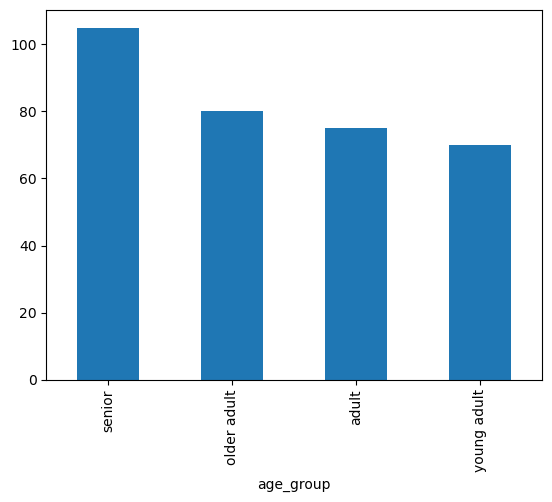

In [115]:
# Create bar chart of distribution of age groups among high spenders
bar = df_high_spender['age_group'].value_counts().plot.bar()

In [117]:
# Export Visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'high_spender_age.png'))

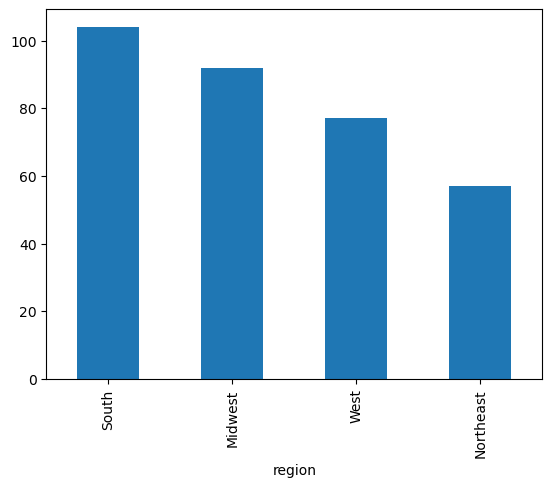

In [119]:
# Create bar chart of distribution of region among high spenders
bar = df_high_spender['region'].value_counts().plot.bar()

In [121]:
# Export Visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'high_spender_region.png'))

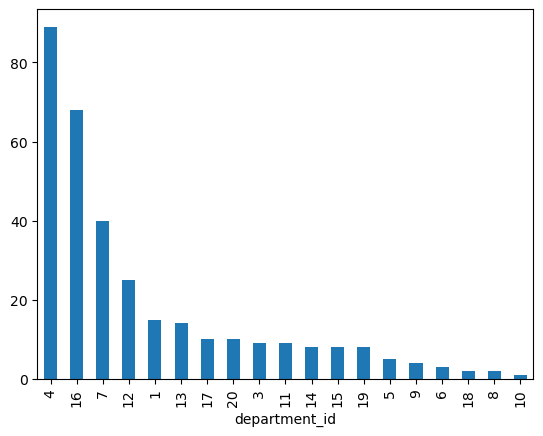

In [123]:
# Create bar chart of distribution of department_id among high spenders
bar = df_high_spender['department_id'].value_counts().plot.bar()

## Analysis of 'income_group' and 'frequency_flag'

In [53]:
# Create a contingency table for income_group and frequency_flag
contingency_table = pd.crosstab(df['income_group'], df['frequency_flag'])

print(contingency_table)

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
income_group                                                              
high-income                  9012                   1082              2811
low-income                   7100                   1135              2504
middle-income               52621                   7034             16929


In [55]:
# Convert to proportions
proportions_table = contingency_table / contingency_table.sum().sum()

print(proportions_table)

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
income_group                                                              
high-income              0.089915               0.010795          0.028046
low-income               0.070838               0.011324          0.024983
middle-income            0.525013               0.070180          0.168905


In [57]:
# Convert to row proportions
row_proportions_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("Contingency Table with Row Proportions:")
print(row_proportions_table)

Contingency Table with Row Proportions:
frequency_flag  Frequent customer  Non-frequent customer  Regular customer
income_group                                                              
high-income              0.698334               0.083843          0.217823
low-income               0.661142               0.105690          0.233169
middle-income            0.687102               0.091847          0.221051


In [59]:
# Save result to clipboard
row_proportions_table.to_clipboard(index=True)

ValueError: Unknown format code 'd' for object of type 'float'

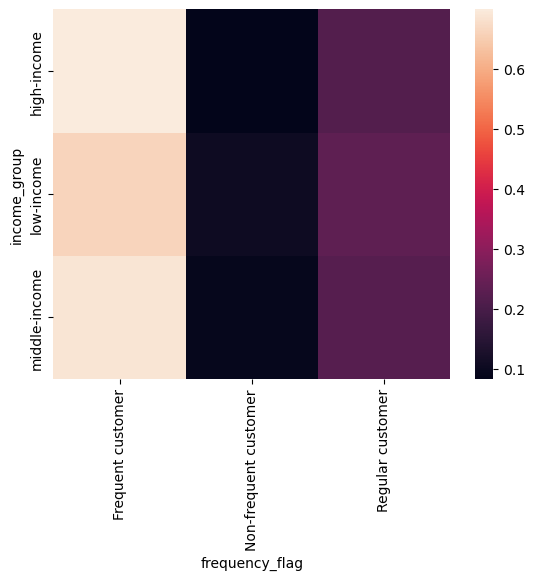

In [61]:
# Plot heatmap
sns.heatmap(row_proportions_table, annot=True, fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

In [63]:
# Convert to column proportions
column_proportions_table = contingency_table.div(contingency_table.sum(axis=0), axis=1)

print("Contingency Table with Column Proportions:")
print(column_proportions_table)

Contingency Table with Column Proportions:
frequency_flag  Frequent customer  Non-frequent customer  Regular customer
income_group                                                              
high-income              0.131116               0.116960          0.126371
low-income               0.103298               0.122689          0.112570
middle-income            0.765586               0.760350          0.761059


## Join Department

In [99]:
# Import departments.csv
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [101]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [127]:
df_dep.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [129]:
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [131]:
# Add department names to main sample
df_merge = df.merge(df_dep, on = 'department_id', indicator = False)

In [133]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,_merge,region,Activity,age_group,income_group,family_role,profile,department
0,1374495,3,1,1,14,NaN,39190,5,0,Vanilla Unsweetened Almond Milk,...,married,93240,both,West,High,young adult,middle-income,married parent,"Female, young adult, middle-income, married pa...",dairy eggs
1,68288,10,2,5,15,30.0,32537,27,0,Parsley,...,married,52716,both,South,High,young adult,middle-income,married parent,"Male, young adult, middle-income, married parent",produce
2,3192400,16,5,2,14,30.0,48745,3,1,Globe Eggplant,...,married,90829,both,Midwest,High,adult,middle-income,married parent,"Male, adult, middle-income, married parent",produce
3,1716848,21,7,5,9,28.0,48988,2,1,Unsweetened Premium Iced Tea,...,divorced/widowed,124643,both,West,High,senior,middle-income,single childless,"Male, senior, middle-income, single childless",beverages
4,1735495,21,27,3,8,9.0,22275,1,0,Sriracha Hot Chili Sauce,...,divorced/widowed,124643,both,West,High,senior,middle-income,single childless,"Male, senior, middle-income, single childless",international


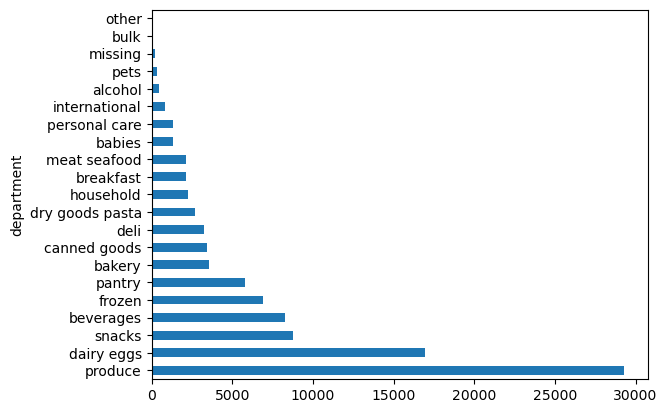

In [137]:
# Create bar chart of distribution of department_id among high spenders
bar = df_merge['department'].value_counts().plot.barh()

In [139]:
# Export Visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_popularity.png'))

## Compare Profiles with Regions

In [146]:
# Create a contingency table for income_group and region
contingency_table = pd.crosstab(df['income_group'], df['region'])

print(contingency_table)

region         Midwest  Northeast  South   West
income_group                                   
high-income       3082       2208   4180   3435
low-income        2467       1834   3650   2788
middle-income    18201      13500  25403  19480


In [148]:
# Convert to row proportions
row_proportions_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("Contingency Table with Row Proportions:")
print(row_proportions_table)

Contingency Table with Row Proportions:
region          Midwest  Northeast     South      West
income_group                                          
high-income    0.238822   0.171096  0.323905  0.266176
low-income     0.229723   0.170779  0.339883  0.259614
middle-income  0.237661   0.176277  0.331701  0.254361


In [152]:
# Create a contingency table for fam_status and region
contingency_table = pd.crosstab(df['fam_status'], df['region'])

print(contingency_table)

region                            Midwest  Northeast  South   West
fam_status                                                        
divorced/widowed                     2041       1552   2813   2167
living with parents and siblings     1180        818   1607   1241
married                             16647      12299  23274  18037
single                               3882       2873   5539   4258


In [154]:
# Convert to row proportions
row_proportions_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("Contingency Table with Row Proportions:")
print(row_proportions_table)

Contingency Table with Row Proportions:
region                             Midwest  Northeast     South      West
fam_status                                                               
divorced/widowed                  0.238073   0.181033  0.328123  0.252770
living with parents and siblings  0.243500   0.168799  0.331614  0.256087
married                           0.236944   0.175057  0.331269  0.256729
single                            0.234534   0.173574  0.334642  0.257250


In [158]:
# Create a contingency table for department and family_role
contingency_table = pd.crosstab(df_merge['family_role'], df_merge['department'])

print(contingency_table)

department        alcohol  babies  bakery  beverages  breakfast  bulk  \
family_role                                                             
married parent        310     923    2526       5804       1523    81   
single childless      106     362     891       2067        539    27   
single parent          19      58     164        393         95     5   

department        canned goods  dairy eggs  deli  dry goods pasta  ...  \
family_role                                                        ...   
married parent            2460       11785  2271             1888  ...   
single childless           804        4297   811              683  ...   
single parent              164         870   157              140  ...   

department        household  international  meat seafood  missing  other  \
family_role                                                                
married parent         1574            579          1554      152     77   
single childless        578        

In [160]:
# Convert to row proportions
row_proportions_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("Contingency Table with Row Proportions:")
print(row_proportions_table)

Contingency Table with Row Proportions:
department         alcohol    babies    bakery  beverages  breakfast  \
family_role                                                            
married parent    0.004412  0.013137  0.035954   0.082611   0.021678   
single childless  0.004219  0.014408  0.035463   0.082269   0.021453   
single parent     0.003921  0.011969  0.033842   0.081098   0.019604   

department            bulk  canned goods  dairy eggs      deli  \
family_role                                                      
married parent    0.001153      0.035014    0.167741  0.032324   
single childless  0.001075      0.032000    0.171025  0.032279   
single parent     0.001032      0.033842    0.179530  0.032398   

department        dry goods pasta  ...  household  international  \
family_role                        ...                             
married parent           0.026873  ...   0.022403       0.008241   
single childless         0.027184  ...   0.023005       0.007801

In [162]:
# Create a contingency table for department and region
contingency_table = pd.crosstab(df_merge['department'], df_merge['region'])

print(contingency_table)

region           Midwest  Northeast  South  West
department                                      
alcohol              110         90    141    94
babies               330        228    459   326
bakery               833        668   1174   906
beverages           1938       1459   2810  2057
breakfast            489        361    723   584
bulk                  21         21     42    29
canned goods         774        578   1132   944
dairy eggs          3978       2993   5650  4331
deli                 734        578   1088   839
dry goods pasta      631        452    941   687
frozen              1646       1186   2341  1761
household            571        423    723   526
international        199        122    278   218
meat seafood         493        406    679   574
missing               42         41     64    74
other                 21         16     36    27
pantry              1403        995   1926  1500
personal care        308        243    447   338
pets                

In [164]:
# Convert to column proportions
column_proportions_table = contingency_table.div(contingency_table.sum(axis=0), axis=1)

print("Contingency Table with Column Proportions:")
print(column_proportions_table)

Contingency Table with Column Proportions:
region            Midwest  Northeast     South      West
department                                              
alcohol          0.004632   0.005131  0.004243  0.003657
babies           0.013895   0.012997  0.013812  0.012683
bakery           0.035074   0.038080  0.035326  0.035249
beverages        0.081600   0.083172  0.084555  0.080030
breakfast        0.020589   0.020579  0.021755  0.022721
bulk             0.000884   0.001197  0.001264  0.001128
canned goods     0.032589   0.032949  0.034063  0.036727
dairy eggs       0.167495   0.170619  0.170012  0.168502
deli             0.030905   0.032949  0.032739  0.032642
dry goods pasta  0.026568   0.025767  0.028315  0.026728
frozen           0.069305   0.067609  0.070442  0.068513
household        0.024042   0.024114  0.021755  0.020465
international    0.008379   0.006955  0.008365  0.008482
meat seafood     0.020758   0.023144  0.020431  0.022332
missing          0.001768   0.002337  0.00192

There are no trends anywhere because the customer data is fabricated

## Addressing Stakeholder Questions

### What time of day do people spend the most money?

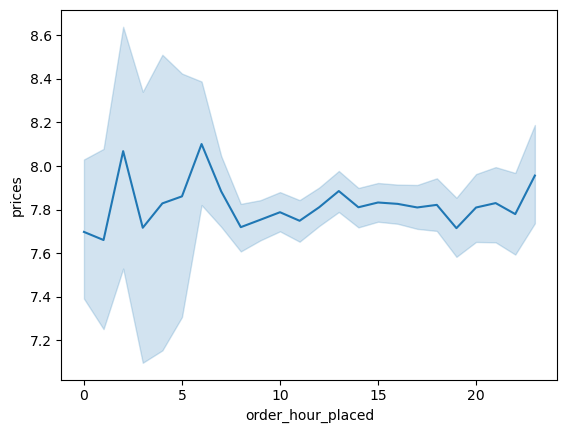

In [173]:
line = sns.lineplot(data = df, x = 'order_hour_placed',y = 'prices')

In [177]:
# Export Visualization
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_ohp.png'))

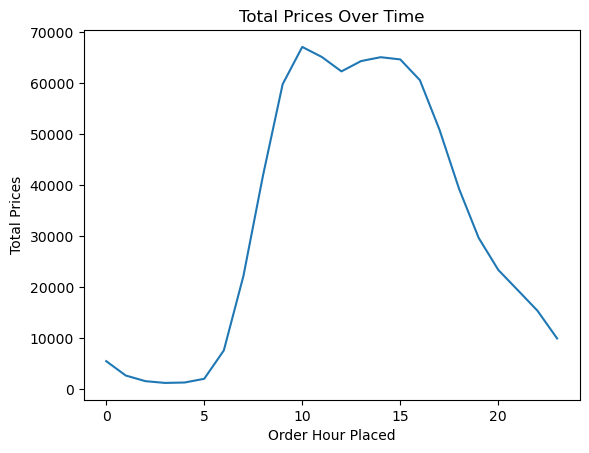

In [175]:
# Aggregate data (sum of prices per hour)
aggregated_df = df.groupby('order_hour_placed', as_index=False).agg({'prices': 'sum'})

# Create line plot
sns.lineplot(data=aggregated_df, x='order_hour_placed', y='prices')

# Add labels and title
plt.xlabel('Order Hour Placed')
plt.ylabel('Total Prices')
plt.title('Total Prices Over Time')

# Show the plot
plt.show()

In [179]:
# Create a contingency table for profile and loyalty_flag
contingency_table = pd.crosstab(df_merge['profile'], df_merge['loyalty_flag'])

print(contingency_table)

loyalty_flag                                        Loyal customer  \
profile                                                              
Female, adult, high-income, married parent                     339   
Female, adult, high-income, single childless                   139   
Female, adult, low-income, married parent                      297   
Female, adult, low-income, single childless                     90   
Female, adult, middle-income, married parent                  2302   
Female, adult, middle-income, single childless                 717   
Female, older adult, high-income, married parent               702   
Female, older adult, high-income, single childless             252   
Female, older adult, low-income, married parent                217   
Female, older adult, low-income, single childless               75   
Female, older adult, middle-income, married parent            2001   
Female, older adult, middle-income, single chil...             717   
Female, senior, high

In [181]:
# Convert to row proportions
row_proportions_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("Contingency Table with Row Proportions:")
print(row_proportions_table)

Contingency Table with Row Proportions:
loyalty_flag                                        Loyal customer  \
profile                                                              
Female, adult, high-income, married parent                0.326275   
Female, adult, high-income, single childless              0.344913   
Female, adult, low-income, married parent                 0.312961   
Female, adult, low-income, single childless               0.299003   
Female, adult, middle-income, married parent              0.345594   
Female, adult, middle-income, single childless            0.326651   
Female, older adult, high-income, married parent          0.390217   
Female, older adult, high-income, single childless        0.417910   
Female, older adult, low-income, married parent           0.313584   
Female, older adult, low-income, single childless         0.308642   
Female, older adult, middle-income, married parent        0.327175   
Female, older adult, middle-income, single chil...

In [183]:
row_proportions_table.to_clipboard(index=True)

In [185]:
# Create a contingency table for fam_status and loyalty_flag
contingency_table = pd.crosstab(df_merge['fam_status'], df_merge['loyalty_flag'])

print(contingency_table)

loyalty_flag                      Loyal customer  New customer  \
fam_status                                                       
divorced/widowed                            2851          1314   
living with parents and siblings            1611           737   
married                                    23297         10832   
single                                      5550          2566   

loyalty_flag                      Regular customer  
fam_status                                          
divorced/widowed                              4408  
living with parents and siblings              2498  
married                                      36128  
single                                        8436  


In [187]:
# Convert to row proportions
row_proportions_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("Contingency Table with Row Proportions:")
print(row_proportions_table)

Contingency Table with Row Proportions:
loyalty_flag                      Loyal customer  New customer  \
fam_status                                                       
divorced/widowed                        0.332556      0.153272   
living with parents and siblings        0.332439      0.152084   
married                                 0.331597      0.154177   
single                                  0.335307      0.155027   

loyalty_flag                      Regular customer  
fam_status                                          
divorced/widowed                          0.514172  
living with parents and siblings          0.515477  
married                                   0.514226  
single                                    0.509667  


In [191]:
df.groupby('loyalty_flag').agg({'order_hour_placed': ['mean', 'min', 'max']})

order_hour_placed        
                              mean min max
loyalty_flag                              
Loyal customer           13.176439   0  23
New customer             13.628973   0  23
Regular customer         13.484476   0  23

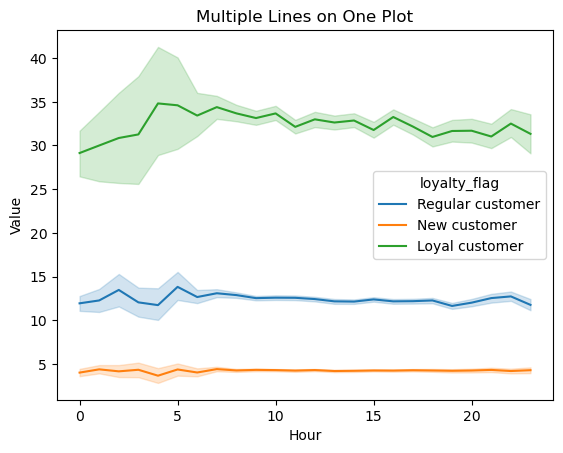

In [195]:
# Create line plot
sns.lineplot(data=df, x='order_hour_placed', y='order_number', hue='loyalty_flag')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Multiple Lines on One Plot')

# Show the plot
plt.show()

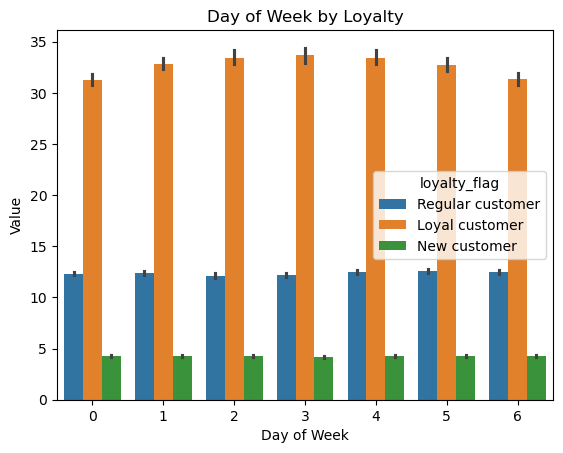

In [201]:
# Create bar chart
sns.barplot(data=df, x='orders_day_of_week', y='order_number', hue='loyalty_flag')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Value')
plt.title('Day of Week by Loyalty')

# Show the plot
plt.show()

In [205]:
# Export Visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_dow_loyalty.png'))

<Figure size 640x480 with 0 Axes>